<a href="https://colab.research.google.com/github/PRAKRUTHI-20/project/blob/main/dstproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
denkuznetz_traffic_accident_prediction_path = kagglehub.dataset_download('denkuznetz/traffic-accident-prediction')

print('Data source import complete.')


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/kaggle/input/traffic-accident-prediction/dataset_traffic_accident_prediction1.csv")
df

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,Rainy,City Road,Morning,1.0,100.0,5.0,0.0,NaN,Wet,Car,51.0,48.0,Artificial Light,0.0
1,Clear,Rural Road,Night,NaN,120.0,3.0,0.0,Moderate,Wet,Truck,49.0,43.0,Artificial Light,0.0
2,Rainy,Highway,Evening,1.0,60.0,4.0,0.0,Low,Icy,Car,54.0,52.0,Artificial Light,0.0
3,Clear,City Road,Afternoon,2.0,60.0,3.0,0.0,Low,Under Construction,Bus,34.0,31.0,Daylight,0.0
4,Rainy,Highway,Morning,1.0,195.0,11.0,0.0,Low,Dry,Car,62.0,55.0,Artificial Light,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,Clear,Highway,Night,2.0,30.0,4.0,0.0,Low,Dry,Car,23.0,15.0,Daylight,0.0
836,Rainy,Rural Road,Evening,2.0,60.0,4.0,0.0,Low,Dry,Motorcycle,52.0,46.0,Daylight,1.0
837,Foggy,Highway,Evening,NaN,30.0,4.0,1.0,High,Dry,Car,NaN,34.0,Artificial Light,NaN
838,Foggy,Highway,Afternoon,2.0,60.0,3.0,0.0,Low,Dry,Car,25.0,19.0,Artificial Light,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Weather               798 non-null    object 
 1   Road_Type             798 non-null    object 
 2   Time_of_Day           798 non-null    object 
 3   Traffic_Density       798 non-null    float64
 4   Speed_Limit           798 non-null    float64
 5   Number_of_Vehicles    798 non-null    float64
 6   Driver_Alcohol        798 non-null    float64
 7   Accident_Severity     798 non-null    object 
 8   Road_Condition        798 non-null    object 
 9   Vehicle_Type          798 non-null    object 
 10  Driver_Age            798 non-null    float64
 11  Driver_Experience     798 non-null    float64
 12  Road_Light_Condition  798 non-null    object 
 13  Accident              798 non-null    float64
dtypes: float64(7), object(7)
memory usage: 92.0+ KB


In [ ]:
df.isnull().sum()

Weather                 42
Road_Type               42
Time_of_Day             42
Traffic_Density         42
Speed_Limit             42
Number_of_Vehicles      42
Driver_Alcohol          42
Accident_Severity       42
Road_Condition          42
Vehicle_Type            42
Driver_Age              42
Driver_Experience       42
Road_Light_Condition    42
Accident                42
dtype: int64

In [ ]:
df1=df.copy()

In [ ]:
df.Traffic_Density=df.Traffic_Density.map({0:"Low density",1: "Moderate density",2: "High density"})

In [ ]:
df

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,Rainy,City Road,Morning,Moderate density,100.0,5.0,0.0,NaN,Wet,Car,51.0,48.0,Artificial Light,0.0
1,Clear,Rural Road,Night,NaN,120.0,3.0,0.0,Moderate,Wet,Truck,49.0,43.0,Artificial Light,0.0
2,Rainy,Highway,Evening,Moderate density,60.0,4.0,0.0,Low,Icy,Car,54.0,52.0,Artificial Light,0.0
3,Clear,City Road,Afternoon,High density,60.0,3.0,0.0,Low,Under Construction,Bus,34.0,31.0,Daylight,0.0
4,Rainy,Highway,Morning,Moderate density,195.0,11.0,0.0,Low,Dry,Car,62.0,55.0,Artificial Light,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,Clear,Highway,Night,High density,30.0,4.0,0.0,Low,Dry,Car,23.0,15.0,Daylight,0.0
836,Rainy,Rural Road,Evening,High density,60.0,4.0,0.0,Low,Dry,Motorcycle,52.0,46.0,Daylight,1.0
837,Foggy,Highway,Evening,NaN,30.0,4.0,1.0,High,Dry,Car,NaN,34.0,Artificial Light,NaN
838,Foggy,Highway,Afternoon,High density,60.0,3.0,0.0,Low,Dry,Car,25.0,19.0,Artificial Light,0.0


array([[<Axes: title={'center': 'Speed_Limit'}>,
        <Axes: title={'center': 'Number_of_Vehicles'}>],
       [<Axes: title={'center': 'Driver_Alcohol'}>,
        <Axes: title={'center': 'Driver_Age'}>],
       [<Axes: title={'center': 'Driver_Experience'}>,
        <Axes: title={'center': 'Accident'}>]], dtype=object)

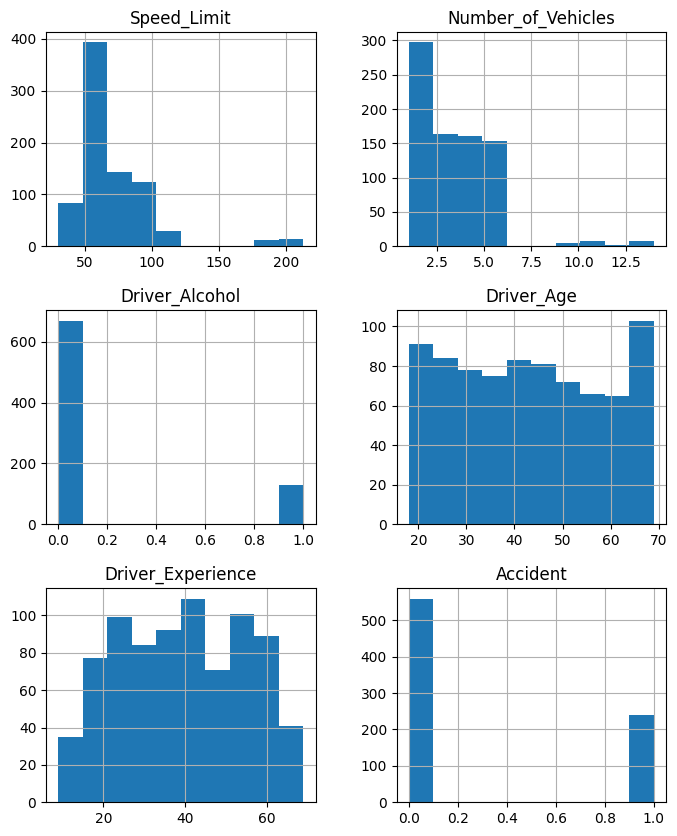

In [ ]:
df.hist(figsize=(8,10))

In [ ]:
df.describe()

,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Driver_Age,Driver_Experience,Accident
count,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000
mean,71.050125,3.286967,0.160401,43.259398,38.981203,0.299499
std,32.052458,2.017267,0.367208,15.129856,15.273201,0.458326
min,30.000000,1.000000,0.000000,18.000000,9.000000,0.000000
25%,50.000000,2.000000,0.000000,30.000000,26.000000,0.000000
50%,60.000000,3.000000,0.000000,43.000000,39.000000,0.000000
75%,80.000000,4.000000,0.000000,56.000000,52.750000,1.000000
max,213.000000,14.000000,1.000000,69.000000,69.000000,1.000000


<Axes: xlabel='Speed_Limit'>

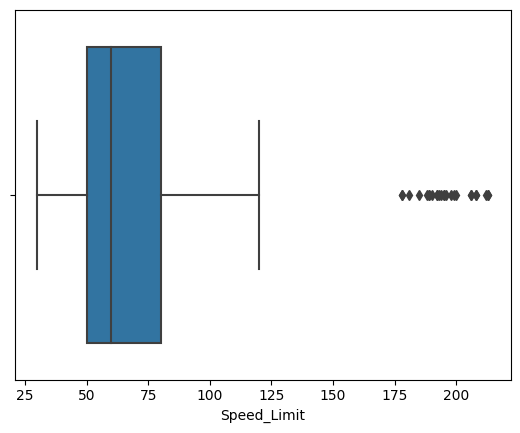

In [ ]:
sns.boxplot(x=df["Speed_Limit"])

<Axes: xlabel='Speed_Limit', ylabel='Accident_Severity'>

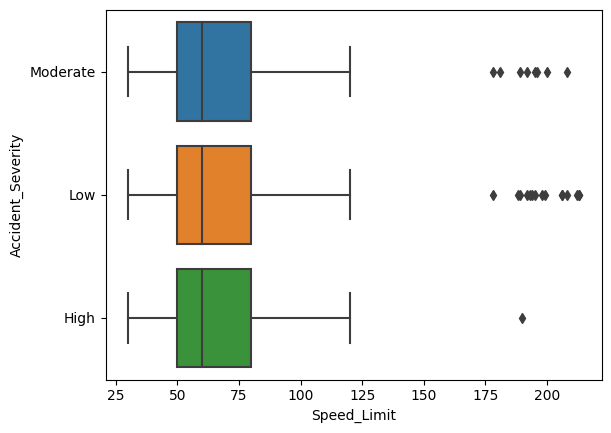

In [ ]:
sns.boxplot(x=df["Speed_Limit"],y=df["Accident_Severity"])

In [ ]:
df.describe()

,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Driver_Age,Driver_Experience,Accident
count,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000
mean,71.050125,3.286967,0.160401,43.259398,38.981203,0.299499
std,32.052458,2.017267,0.367208,15.129856,15.273201,0.458326
min,30.000000,1.000000,0.000000,18.000000,9.000000,0.000000
25%,50.000000,2.000000,0.000000,30.000000,26.000000,0.000000
50%,60.000000,3.000000,0.000000,43.000000,39.000000,0.000000
75%,80.000000,4.000000,0.000000,56.000000,52.750000,1.000000
max,213.000000,14.000000,1.000000,69.000000,69.000000,1.000000


<Axes: xlabel='Number_of_Vehicles'>

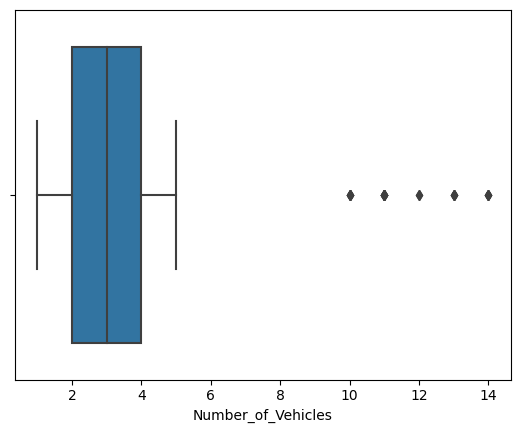

In [ ]:
sns.boxplot(x=df.Number_of_Vehicles)

<Axes: xlabel='Number_of_Vehicles', ylabel='Accident_Severity'>

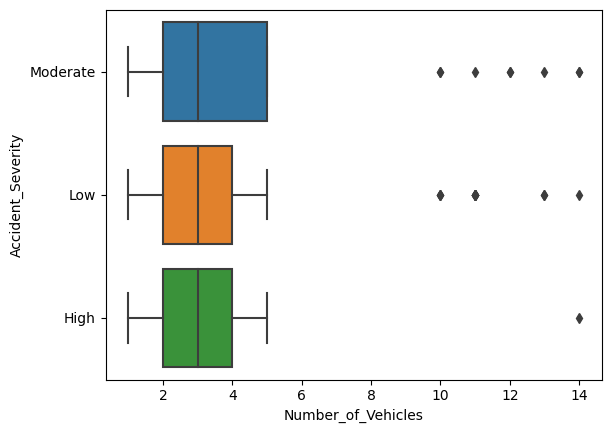

In [ ]:
sns.boxplot(x=df["Number_of_Vehicles"],y=df["Accident_Severity"])

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Accident_Severity', ylabel='Driver_Age'>

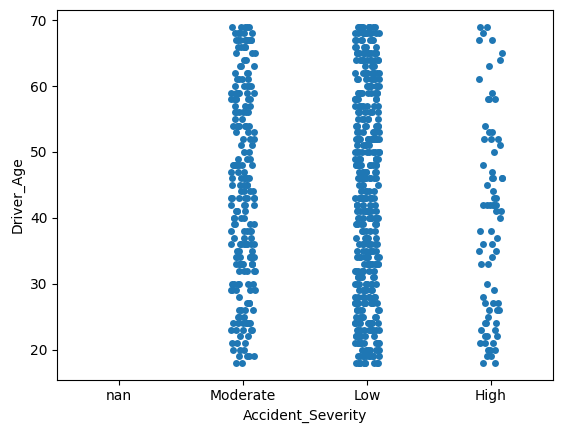

In [ ]:
sns.stripplot(x="Accident_Severity", y="Driver_Age", data=df,jitter=True)

<Axes: xlabel='Accident_Severity', ylabel='count'>

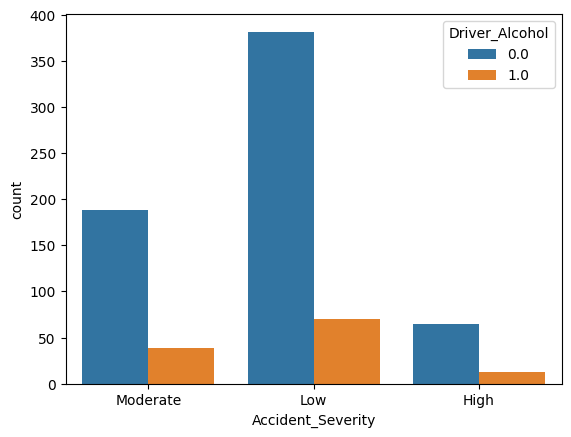

In [ ]:
sns.countplot(data=df,x=df.Accident_Severity,hue=df.Driver_Alcohol)

In [ ]:
df.groupby("Accident_Severity").Driver_Alcohol.value_counts()/df.groupby("Accident_Severity").size()

Accident_Severity  Driver_Alcohol
High               0.0               0.822785
                   1.0               0.164557
Low                0.0               0.799163
                   1.0               0.146444
Moderate           0.0               0.780083
                   1.0               0.161826
dtype: float64

<Axes: xlabel='Accident_Severity', ylabel='Speed_Limit'>

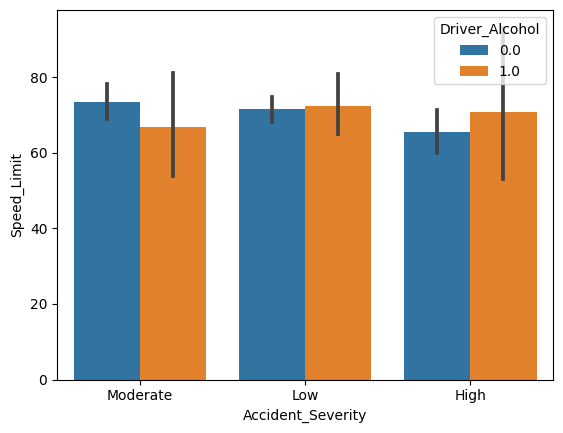

In [ ]:
sns.barplot(x=df.Accident_Severity,y=df.Speed_Limit,hue=df.Driver_Alcohol)

<Axes: xlabel='Speed_Limit', ylabel='Weather'>

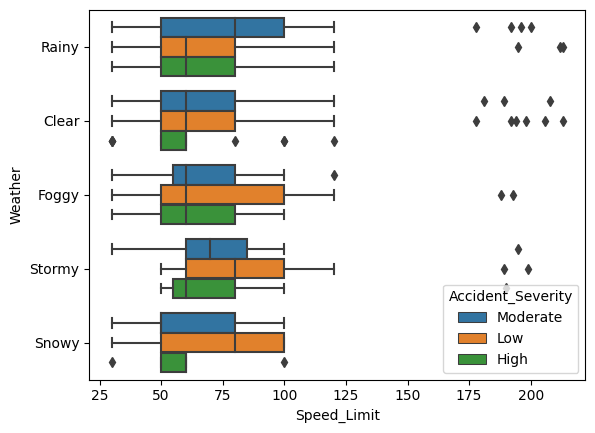

In [ ]:
sns.boxplot(x=df.Speed_Limit,y=df.Weather,hue=df.Accident_Severity)

In [ ]:
df.groupby("Weather").Speed_Limit.mean()

Weather
Clear     71.204334
Foggy     70.056604
Rainy     71.601852
Snowy     66.385542
Stormy    83.727273
Name: Speed_Limit, dtype: float64

<Axes: xlabel='Weather'>

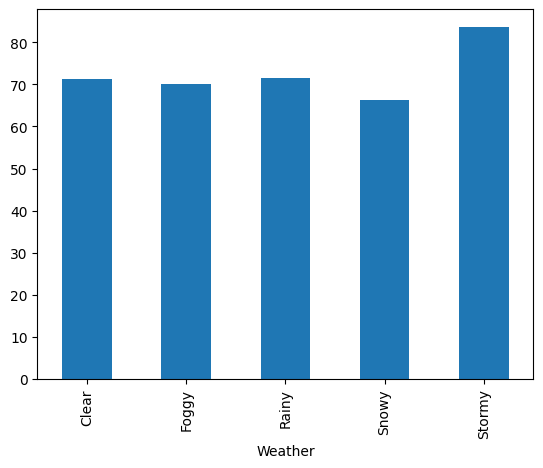

In [ ]:
df.groupby("Weather").Speed_Limit.mean().plot(kind="bar")

<Axes: xlabel='Accident_Severity', ylabel='count'>

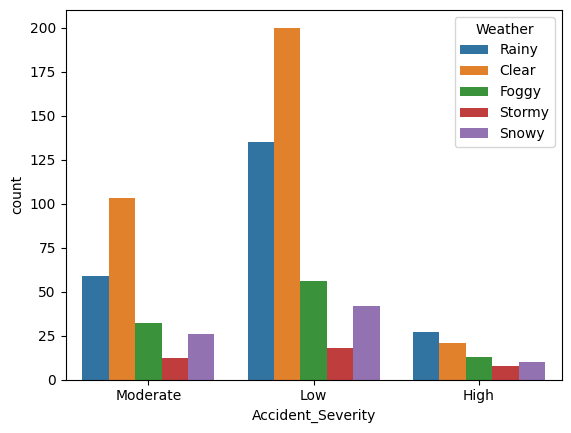

In [ ]:
sns.countplot(x=df.Accident_Severity,hue=df.Weather)

In [ ]:
g=df.groupby("Accident_Severity")

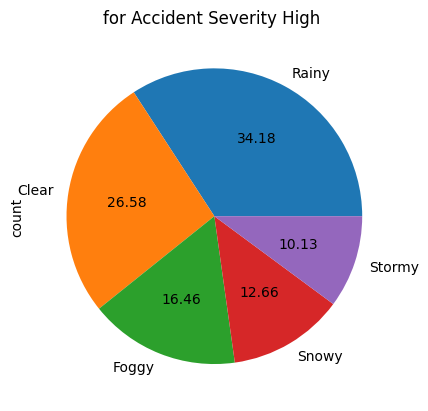

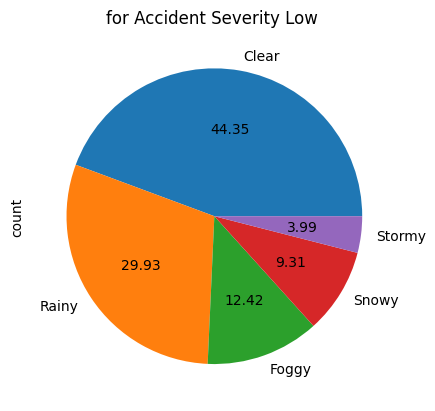

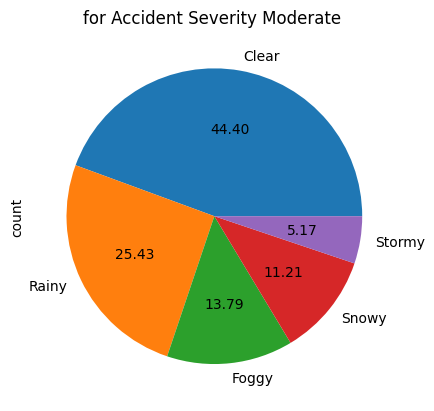

In [ ]:
for group_name,group_data in g:
    plt.figure()
    plt.title(f"for Accident Severity {group_name} ")
    group_data.Weather.value_counts().plot(kind="pie",autopct="%.2f")

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Weather', ylabel='Speed_Limit'>

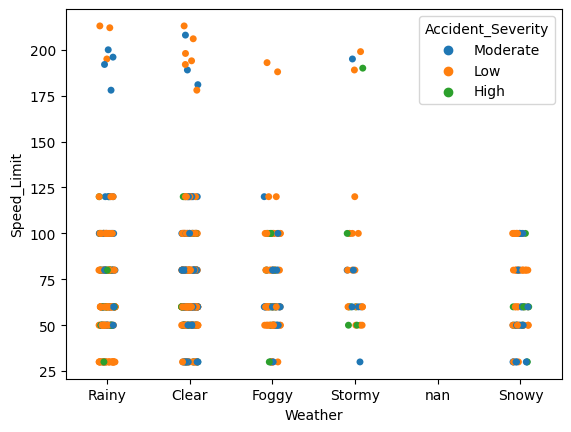

In [ ]:
sns.stripplot(x=df.Weather,y=df.Speed_Limit,hue=df.Accident_Severity)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Weather', ylabel='Number_of_Vehicles'>

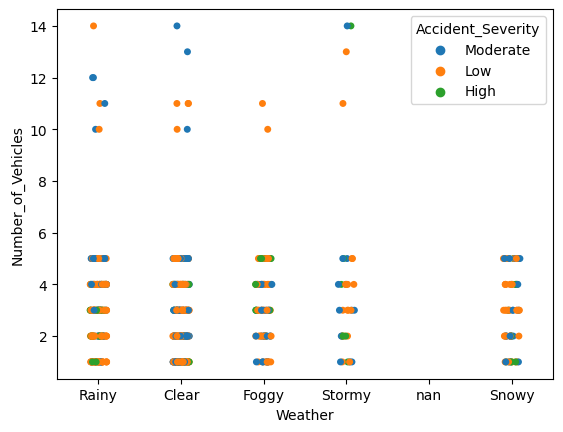

In [ ]:
sns.stripplot(x=df.Weather,y=df.Number_of_Vehicles,hue=df.Accident_Severity)

<Axes: xlabel='Weather', ylabel='count'>

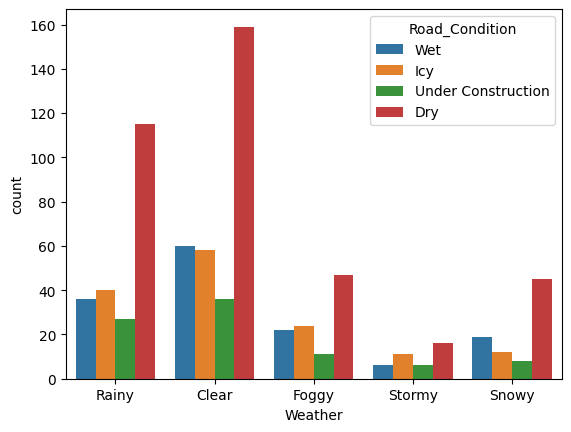

In [ ]:
sns.countplot(x=df.Weather,hue=df.Road_Condition)

<Axes: xlabel='Road_Type', ylabel='count'>

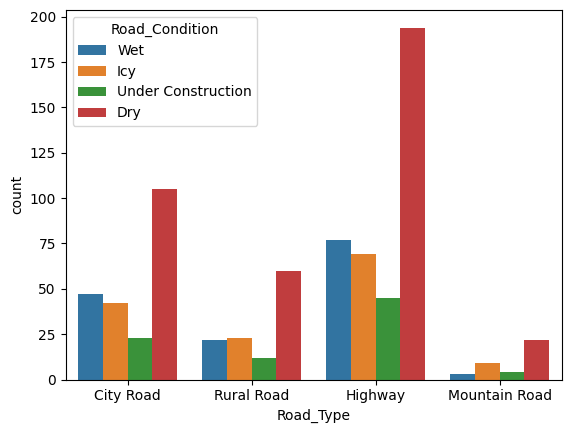

In [ ]:
sns.countplot(x=df.Road_Type,hue=df.Road_Condition)

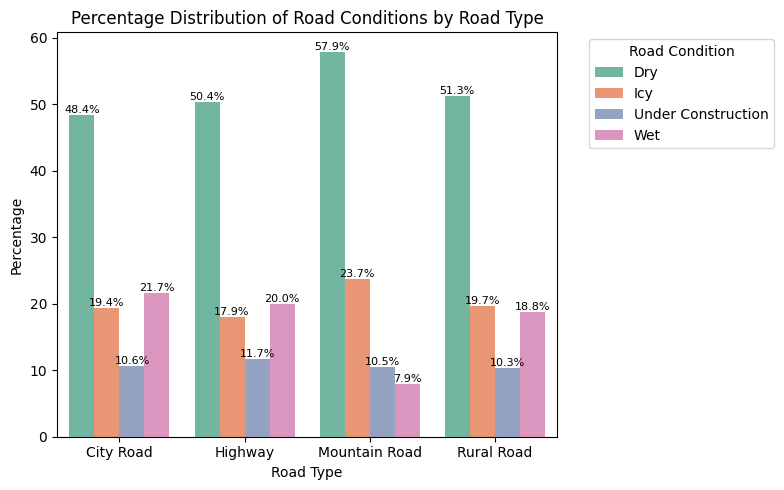

In [ ]:
road_condition_counts = df.groupby(["Road_Type", "Road_Condition"]).size().reset_index(name="Count")

# Calculate raw percentages
road_condition_counts["Percentage"] = road_condition_counts.groupby("Road_Type")["Count"].transform(lambda x: (x / x.sum()) * 100)

# Adjust percentages to ensure they sum to 100% for each Road_Type
def adjust_percentages(group):
    total = group["Percentage"].sum()
    group["Percentage"] = group["Percentage"] * (100 / total)  # Scale percentages to sum to 100
    return group

road_condition_counts = road_condition_counts.groupby("Road_Type").apply(adjust_percentages)

# Plot the bar chart
plt.figure(figsize=(8, 5))
ax = sns.barplot(x="Road_Type", y="Percentage", hue="Road_Condition", data=road_condition_counts, palette="Set2")

# Annotate bars with percentages
for container in ax.containers:
    for bar in container:
        # Get the height (percentage) of the bar
        percentage = bar.get_height()
        if percentage > 0:  # Avoid annotating zero-height bars
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                percentage,
                f"{percentage:.1f}%",
                ha="center",
                va="bottom",
                fontsize=8
            )

# Customize the chart
plt.title('Percentage Distribution of Road Conditions by Road Type')
plt.ylabel('Percentage')
plt.xlabel('Road Type')
plt.legend(title='Road Condition',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


([<matplotlib.axis.XTick at 0x7ca7b4a89c00>,
 [Text(0, 0, '18.0'),
  Text(5, 0, '23.0'),
  Text(10, 0, '28.0'),
  Text(15, 0, '33.0'),
  Text(20, 0, '38.0'),
  Text(25, 0, '43.0'),
  Text(30, 0, '48.0'),
  Text(35, 0, '53.0'),
  Text(40, 0, '58.0'),
  Text(45, 0, '63.0'),
  Text(50, 0, '68.0'),
  Text(55, 0, ''),
  Text(60, 0, ''),
  Text(65, 0, '')])

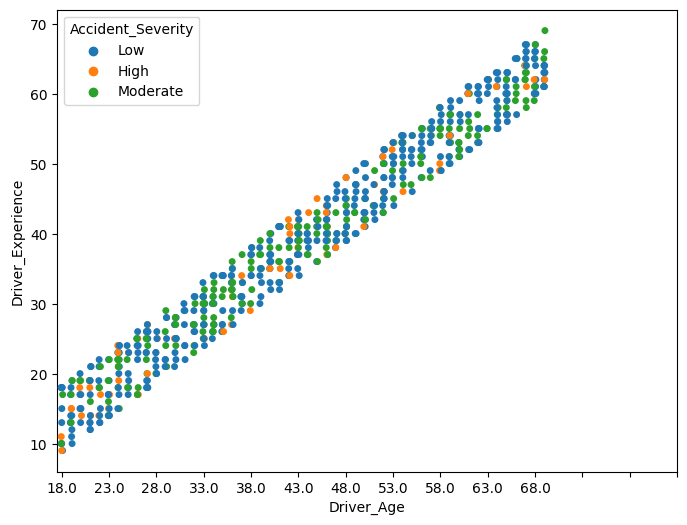

In [ ]:

plt.figure(figsize=(8,6))
sns.stripplot(x=df.Driver_Age,y=df.Driver_Experience,hue=df.Accident_Severity)
plt.xticks(np.arange(0,69,5))

In [ ]:
def grouper(col,index,df):
    if df[col].loc[index]<=28:
        return "18-28"
    elif 28<df[col].loc[index]<=38:
        return "29-38"
    elif 38<df[col].loc[index]<=48:
        return "39-48"
    elif 48<df[col].loc[index]<=58:
        return "49-58"
    elif 58<df[col].loc[index]<=68:
        return "59-68"
    else:
        return "older 68 "

In [ ]:
g2=df.groupby(lambda x:grouper("Driver_Age",x,df))

In [ ]:
g2.Accident_Severity.value_counts()

           Accident_Severity
18-28      Low                  100
           Moderate              39
           High                  26
29-38      Low                   78
           Moderate              54
           High                  12
39-48      Low                   89
           Moderate              48
           High                  19
49-58      Low                   83
           Moderate              37
           High                  11
59-68      Low                   90
           Moderate              45
           High                   8
older 68   Low                   38
           Moderate              18
           High                   3
Name: count, dtype: int64

In [ ]:
g2.size()

18-28        175
29-38        153
39-48        164
49-58        138
59-68        148
older 68      62
dtype: int64

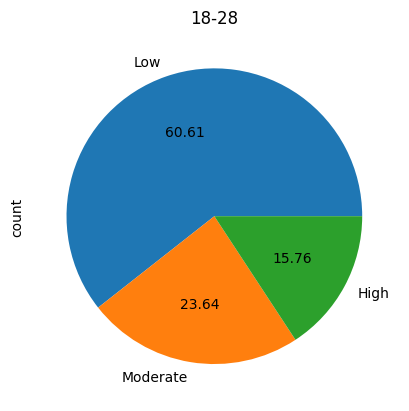

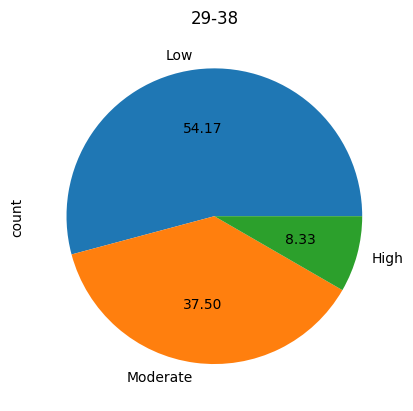

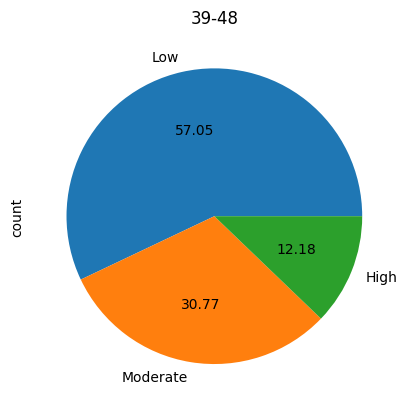

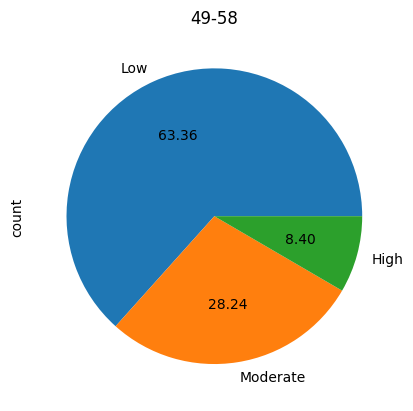

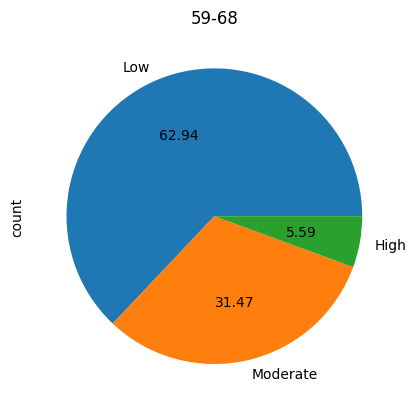

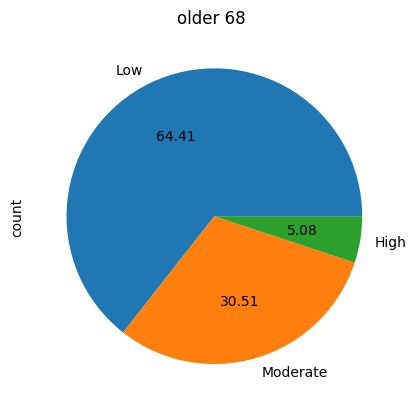

In [ ]:
for group_name,group_data in g2:
    plt.figure()
    plt.title(f"{group_name}")
    group_data.Accident_Severity.value_counts().plot(kind="pie",autopct="%.2f")